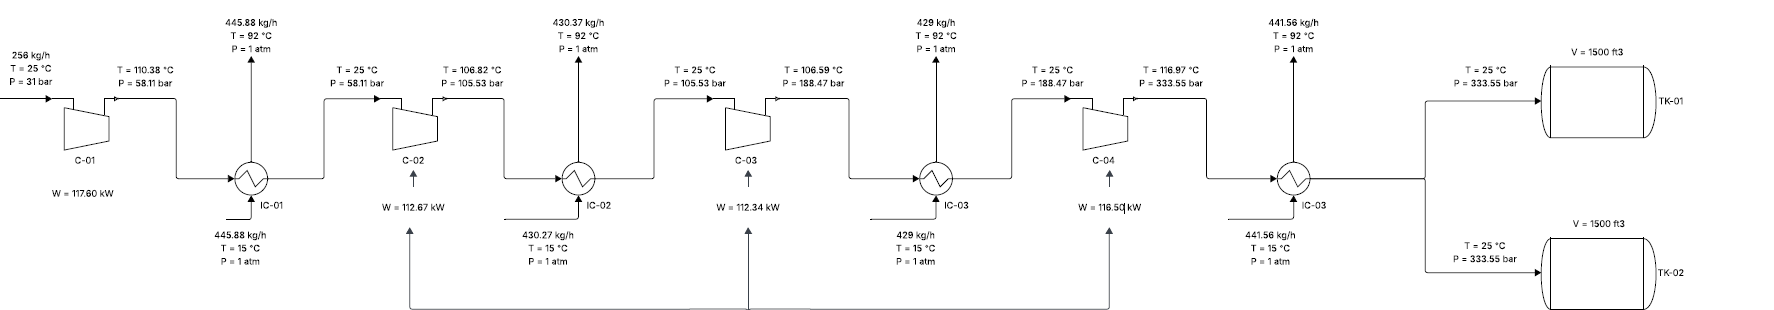

<h1>Operating cost</h1>

The cost of producing a chemical product will include the items listed below. They are
divided into two groups.
1. Fixed operating costs: costs that do not vary with production rate. These are the bills that have to be paid whatever the quantity produced.
2. Variable operating costs: costs that are dependent on the amount of product produced.


<h2>Fixed cost</h2>

Fixed cost consider:
<ol>
    <li>Maintenance (labour and materials): typically 5 to 15 per cent of the installed capital costs</li>
    <li>Utilities (Services)</li>
         <ol>
            <li>Power</li>
            <li>Cooling and process water</li>
        </ol>
    <li>Taxes </li>
    <li>Operation labour: Should be calculated from an estimate of the number of shift and day personnel needed, should include:</li>
        <ol>
            <li>Vacaciones</li>
            <li>Aguinaldo</li>
            <li>Prima vacacional</li>
            <li>IMSS</li>
            <li>INFONAVIT</li>
        </oll>
</li>
</ol>





<h3>Maintenace</h3>

In [185]:
class Maintenance:
    def __init__(self, installed_capital_cost):
        self.installed_capital_cost = installed_capital_cost
        self.calculate_maintenance_cost()

    def calculate_maintenance_cost(self):
        self.maintenance_cost=self.installed_capital_cost * 0.14
        return self.maintenance_cost
     

compresores=155462381.80	 #mnx total
tanques= 610272.38 *2 #mnx total

total_equipos=(compresores+tanques)
Main_total = Maintenance(total_equipos)
Main_total.maintenance_cost
print("El costo de mantenimiento es: ${:,.2f}".format(Main_total.maintenance_cost),"MNX al año")


El costo de mantenimiento es: $21,935,609.72 MNX al año


<h3>Servicios auxiliares</h3>

**Power**

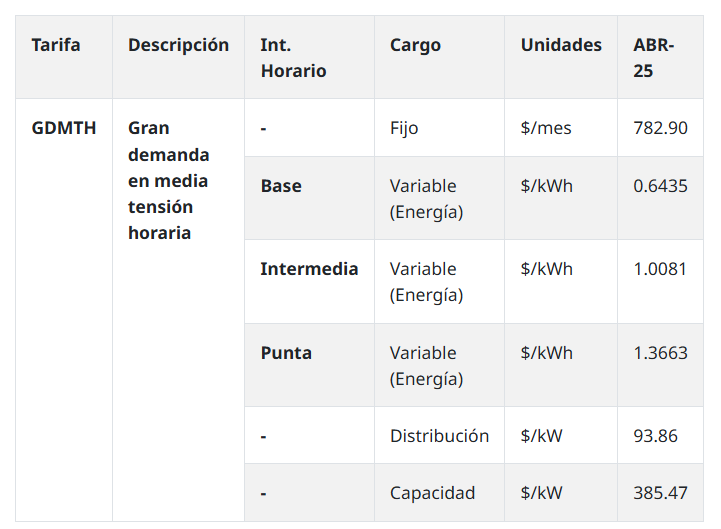

In [186]:
"""Considerando que deacuero con datos de la CFE, el precio de la energia es del 1.4764 $/kWh  en punta para el estado de baja California, municipio de Mexicali"""
"""Referencia: https://app.cfe.mx/Aplicaciones/CCFE/Tarifas/TarifasCREIndustria/Tarifas/DemandaIndustrialSub.aspx"""

def energy_cost(energy_kwh):
    fijo=782.90*12#Costo fijo de la CFE
    price_per_kwh = 1.3663  # Price in $/kWh
    energy_year= energy_kwh * 365  # Energy consumption in a year
    cost_year =  energy_year* price_per_kwh  # Corrected multiplication
    # Agregar distribución y capacidad de la CFE
    distribucion=((energy_kwh*30)/(24*365*0.57))*93.86*6
    capacidad= ((energy_kwh*30)/(24*365*0.57))*1385.31*6 

    total_cost = cost_year + fijo + distribucion+capacidad # Total cost for a year
    
    return total_cost

energy = 459.11*3 # kW/
Power_total = energy_cost(energy)
print("El costo de energía es: ${:,.2f}".format(Power_total), "MNX al año")


El costo de energía es: $769,711.45 MNX al año


**Cooling water**

In [187]:
#SERVICIO INDUSTRIAL MEDIDO
#tarifa de industrial con cuotas de Baja california 
#https://www.oosapascomondu.gob.mx/index.php/servicios/Cuotas
IC_01=850 #kg/h
IC_02=850 #kg/h
IC_03=850 #kg/h
IC_04=850 #kg/h
IC_05=600 #kg/h
IC_06=850 #kg/h


flujo_masico=(IC_01+IC_02+IC_03+IC_04+IC_05+IC_06)*4 #kg/dia
dens=1000 #kg/m³

flujo_volumen=flujo_masico/dens #m³/dia

def water_cost(water):
    price_per_m3=39.16 #MNX
    water_m3=water
    CWater_total = water_m3 * price_per_m3*365 #MNX al año
    return CWater_total 

########## costos de agua 
water_total=water_cost(flujo_volumen) #Replace with your input value
water_total
print("El costo del agua es: ${:,.2f}".format(water_total), "MNX al año")



El costo del agua es: $277,291.96 MNX al año


<h3>Operating labour</h3>

In [188]:
import pandas as pd
trabajo = {
    "Personal": ["Ingeniero de procesos", 
                 "Operadores de planta ", 
                 "Personal Técnico y de Mantenimiento mecánico",
                 "Personal Técnico eléctrico/instrumentación",
                 "Ingeniero de seguridad de procesos",
                 "Administrador/a general",
                 "Responsable de recursos humanos",
                 "Ingeniero ambiental",
                 "Personal de intendendia industrial"],
    "Cantidad de personal": [2,
                             4,
                             2,
                             2,
                             1,
                             1,
                             1,
                             1,
                             4],
    "Salario c/u": [30000,
                    10000,
                    12000,
                    12000,
                    30000,
                    25000,
                    20000,
                    25000,
                    9000],
}

#Dataframe creation and calculations of the salary per month and year
recursos_humano = pd.DataFrame(trabajo)

#modificaciones de la tabla
recursos_humano["Salario total (MNX/mes)"] = recursos_humano["Cantidad de personal"] * recursos_humano["Salario c/u"]
recursos_humano["Salario total (MNX/año)"] = recursos_humano["Salario total (MNX/mes)"] * 12 #meses de trabajo al año
recursos_humano["Vacaciones (MNX/año)"]=(recursos_humano["Salario c/u"]/30*6)*recursos_humano["Cantidad de personal"]# LFT establece un mínimo de 6 días de vacaciones anuales. Este número aumenta en 2 días por cada año de servicio, hasta un máximo de 20 días. En este caso, se considera un mínimo de 6 días para todos los trabajadores.
recursos_humano["Aguinaldo (MNX/año)"]=(recursos_humano["Salario c/u"]/30*15)*recursos_humano["Cantidad de personal"]#La LFT establece un aguinaldo equivalente a 15 días de salario
recursos_humano["Prima Vacacional (MNX/año)"]=(recursos_humano["Salario c/u"]/30*12*0.25)*recursos_humano["Cantidad de personal"]#La LFT también establece una prima vacacional del 25% del salario por cada día de vacaciones
##calculo de prestaciones IMSS e INFONAVIT
##El salario base de cotización (SBC) es el salario diario integrado que se utiliza para calcular las aportaciones al IMSS y al INFONAVIT.
recursos_humano["Salario base de cotización (SBC/cu/diario)"]=(recursos_humano["Salario c/u"]/30)+((recursos_humano["Vacaciones (MNX/año)"]/recursos_humano["Cantidad de personal"])+(recursos_humano["Aguinaldo (MNX/año)"]/recursos_humano["Cantidad de personal"])+(recursos_humano["Prima Vacacional (MNX/año)"]/recursos_humano["Cantidad de personal"]))/365
##El IMSS establece una tasa de aportación del 26% sobre el SBC para el seguro de enfermedades y maternidad, riesgos de trabajo, guarderías y prestaciones sociales.
recursos_humano["IMSS/mes"] = recursos_humano["Salario base de cotización (SBC/cu/diario)"]*30*0.26 *recursos_humano["Cantidad de personal"]
##El INFONAVIT establece una tasa de aportación del 5% sobre el SBC para el fondo de vivienda.
recursos_humano["INFONAVIT/mes"] = recursos_humano["Salario base de cotización (SBC/cu/diario)"]*30*0.05 *recursos_humano["Cantidad de personal"]

recursos_humano["IMSS/año"] = recursos_humano["IMSS/mes"]*12 #12 meses al año
recursos_humano["INFONAVIT/año"] = recursos_humano["INFONAVIT/mes"]*12 #12 meses al año
## IMPUESTOS
recursos_humano["ISN (MXN/año)"] =(recursos_humano["Salario total (MNX/año)"]+recursos_humano["Aguinaldo (MNX/año)"]+recursos_humano["Prima Vacacional (MNX/año)"]+recursos_humano["Vacaciones (MNX/año)"])*0.018


##sumar todo los datos del los cotos de personal
recursos_humano.loc["Total"] = recursos_humano[["Cantidad de personal", "Salario c/u", "Salario total (MNX/mes)","Salario total (MNX/año)",
                                               "Aguinaldo (MNX/año)","Prima Vacacional (MNX/año)","IMSS/año","INFONAVIT/año","IMSS/mes","INFONAVIT/mes", "ISN (MXN/año)","Vacaciones (MNX/año)"]].replace('[\$,]', '', regex=True).astype(float).sum()
recursos_humano.loc["Total", "Personal"] = "Total"


##Guardar valores para que se mantengan con numero y poder hacer operacion con ellos 
total_anual=recursos_humano.iloc[-1]["Salario total (MNX/año)"]
total_vacaciones_anual=recursos_humano.iloc[-1]["Vacaciones (MNX/año)"]
total_aguinaldo_anual=recursos_humano.iloc[-1]["Aguinaldo (MNX/año)"]     
total_prima_vacacional_anual=recursos_humano.iloc[-1]["Prima Vacacional (MNX/año)"]
total_IMSS_anual=recursos_humano.iloc[-1]["IMSS/año"]
total_INFONAVIT_anual=recursos_humano.iloc[-1]["INFONAVIT/año"]
tax_total=recursos_humano.iloc[-1]["ISN (MXN/año)"]
 

##Formato de la tabla
recursos_humano["Salario total (MNX/mes)"] = recursos_humano["Salario total (MNX/mes)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Salario total (MNX/año)"] = recursos_humano["Salario total (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Aguinaldo (MNX/año)"] = recursos_humano["Aguinaldo (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Vacaciones (MNX/año)"] = recursos_humano["Vacaciones (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Prima Vacacional (MNX/año)"] = recursos_humano["Prima Vacacional (MNX/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Salario c/u"] = recursos_humano["Salario c/u"].apply(lambda x: f"${x:,.2f}")
recursos_humano["Salario base de cotización (SBC/cu/diario)"] = recursos_humano["Salario base de cotización (SBC/cu/diario)"].apply(lambda x: f"${x:,.2f}")
recursos_humano["IMSS/mes"] = recursos_humano["IMSS/mes"].apply(lambda x: f"${x:,.2f}")
recursos_humano["INFONAVIT/mes"] = recursos_humano["INFONAVIT/mes"].apply(lambda x: f"${x:,.2f}")
recursos_humano["IMSS/año"] = recursos_humano["IMSS/año"].apply(lambda x: f"${x:,.2f}")
recursos_humano["INFONAVIT/año"] = recursos_humano["INFONAVIT/año"].apply(lambda x: f"${x:,.2f}")
recursos_humano["ISN (MXN/año)"] = recursos_humano["ISN (MXN/año)"].apply(lambda x: f"${x:,.2f}")
recursos_humano

,Personal,Cantidad de personal,Salario c/u,Salario total (MNX/mes),Salario total (MNX/año),Vacaciones (MNX/año),Aguinaldo (MNX/año),Prima Vacacional (MNX/año),Salario base de cotización (SBC/cu/diario),IMSS/mes,INFONAVIT/mes,IMSS/año,INFONAVIT/año,ISN (MXN/año)
0,Ingeniero de procesos,2.0,"$30,000.00","$60,000.00","$720,000.00","$12,000.00","$30,000.00","$6,000.00","$1,065.75","$16,625.75","$3,197.26","$199,509.04","$38,367.12","$13,824.00"
1,Operadores de planta,4.0,"$10,000.00","$40,000.00","$480,000.00","$8,000.00","$20,000.00","$4,000.00",$355.25,"$11,083.84","$2,131.51","$133,006.03","$25,578.08","$9,216.00"
2,Personal Técnico y de Mantenimiento mecánico,2.0,"$12,000.00","$24,000.00","$288,000.00","$4,800.00","$12,000.00","$2,400.00",$426.30,"$6,650.30","$1,278.90","$79,803.62","$15,346.85","$5,529.60"
3,Personal Técnico eléctrico/instrumentación,2.0,"$12,000.00","$24,000.00","$288,000.00","$4,800.00","$12,000.00","$2,400.00",$426.30,"$6,650.30","$1,278.90","$79,803.62","$15,346.85","$5,529.60"
4,Ingeniero de seguridad de procesos,1.0,"$30,000.00","$30,000.00","$360,000.00","$6,000.00","$15,000.00","$3,000.00","$1,065.75","$8,312.88","$1,598.63","$99,754.52","$19,183.56","$6,912.00"
5,Administrador/a general,1.0,"$25,000.00","$25,000.00","$300,000.00","$5,000.00","$12,500.00","$2,500.00",$888.13,"$6,927.40","$1,332.19","$83,128.77","$15,986.30","$5,760.00"
6,Responsable de recursos humanos,1.0,"$20,000.00","$20,000.00","$240,000.00","$4,000.00","$10,000.00","$2,000.00",$710.50,"$5,541.92","$1,065.75","$66,503.01","$12,789.04","$4,608.00"
7,Ingeniero ambiental,1.0,"$25,000.00","$25,000.00","$300,000.00","$5,000.00","$12,500.00","$2,500.00",$888.13,"$6,927.40","$1,332.19","$83,128.77","$15,986.30","$5,760.00"
8,Personal de intendendia industrial,4.0,"$9,000.00","$36,000.00","$432,000.00","$7,200.00","$18,000.00","$3,600.00",$319.73,"$9,975.45","$1,918.36","$119,705.42","$23,020.27","$8,294.40"
Total,Total,18.0,"$173,000.00","$284,000.00","$3,408,000.00","$56,800.00","$142,000.00","$28,400.00",$nan,"$78,695.23","$15,133.70","$944,342.79","$181,604.38","$65,433.60"


In [189]:
totals = {
    "Concepto": ["Total salarial anual", "Total vacaciones anual", "Total aguinaldo anual", 
                 "Total prima vacacional anual", "Total IMSS anual", "Total INFONAVIT anual"],
    "Monto (MNX/año)": [total_anual, total_vacaciones_anual, total_aguinaldo_anual, 
                    total_prima_vacacional_anual, total_IMSS_anual, total_INFONAVIT_anual]
}
final = pd.DataFrame(totals)

final.loc["Total"]= final[["Monto (MNX/año)"]].replace('[\$,]', '', regex=True).astype(float).sum()
sueldos_total = final.iloc[-1]["Monto (MNX/año)"]
OL_total = final.iloc[-1]["Monto (MNX/año)"]
final.loc["Total", "Concepto"] = "Total"
final["Monto (MNX/año)"] = final["Monto (MNX/año)"].apply(lambda x: f"${x:,.2f}")

final

,Concepto,Monto (MNX/año)
0,Total salarial anual,"$3,408,000.00"
1,Total vacaciones anual,"$56,800.00"
2,Total aguinaldo anual,"$142,000.00"
3,Total prima vacacional anual,"$28,400.00"
4,Total IMSS anual,"$944,342.79"
5,Total INFONAVIT anual,"$181,604.38"
Total,Total,"$4,761,147.18"


<h3>Taxes</h3>

 Las personas físicas y Morales están obligados al pago de **impuestos sobre la renta**. De acuerdo con el artículo 9 ley las personas morales deben de aplicar la tasa del 30%


El Artículo 34, fracción XIIl, establece que tanto personas físicas como morales **podrán deducir el 100% de impuestos de la inversión realizada en sistemas de generación de energía renovable.**

In [190]:
ISR=170382000 #MXN al año
ISR=ISR*0.30 #30% de ISR
print("Impuesto sobre la renta: ${:,.2f}".format(ISR), "MNX al año")


Impuesto sobre la renta: $51,114,600.00 MNX al año


**El Impuesto Sobre Nómina (ISN)** es un impuesto estatal que deben pagar las empresas por los pagos que hacen a sus trabajadores. Se calcula como un porcentaje del total de los pagos realizados por concepto de sueldos, salarios y otras prestaciones laborales. 
**Para el caso específico del estado de Baja California se considera una tarifa del 1.8%**

In [191]:
#cálculo del impuesto sobre la Nómina
recursos_humano[["Salario total (MNX/año)","Vacaciones (MNX/año)","Prima Vacacional (MNX/año)" ,"Aguinaldo (MNX/año)","ISN (MXN/año)"]]


,Salario total (MNX/año),Vacaciones (MNX/año),Prima Vacacional (MNX/año),Aguinaldo (MNX/año),ISN (MXN/año)
0,"$720,000.00","$12,000.00","$6,000.00","$30,000.00","$13,824.00"
1,"$480,000.00","$8,000.00","$4,000.00","$20,000.00","$9,216.00"
2,"$288,000.00","$4,800.00","$2,400.00","$12,000.00","$5,529.60"
3,"$288,000.00","$4,800.00","$2,400.00","$12,000.00","$5,529.60"
4,"$360,000.00","$6,000.00","$3,000.00","$15,000.00","$6,912.00"
5,"$300,000.00","$5,000.00","$2,500.00","$12,500.00","$5,760.00"
6,"$240,000.00","$4,000.00","$2,000.00","$10,000.00","$4,608.00"
7,"$300,000.00","$5,000.00","$2,500.00","$12,500.00","$5,760.00"
8,"$432,000.00","$7,200.00","$3,600.00","$18,000.00","$8,294.40"
Total,"$3,408,000.00","$56,800.00","$28,400.00","$142,000.00","$65,433.60"


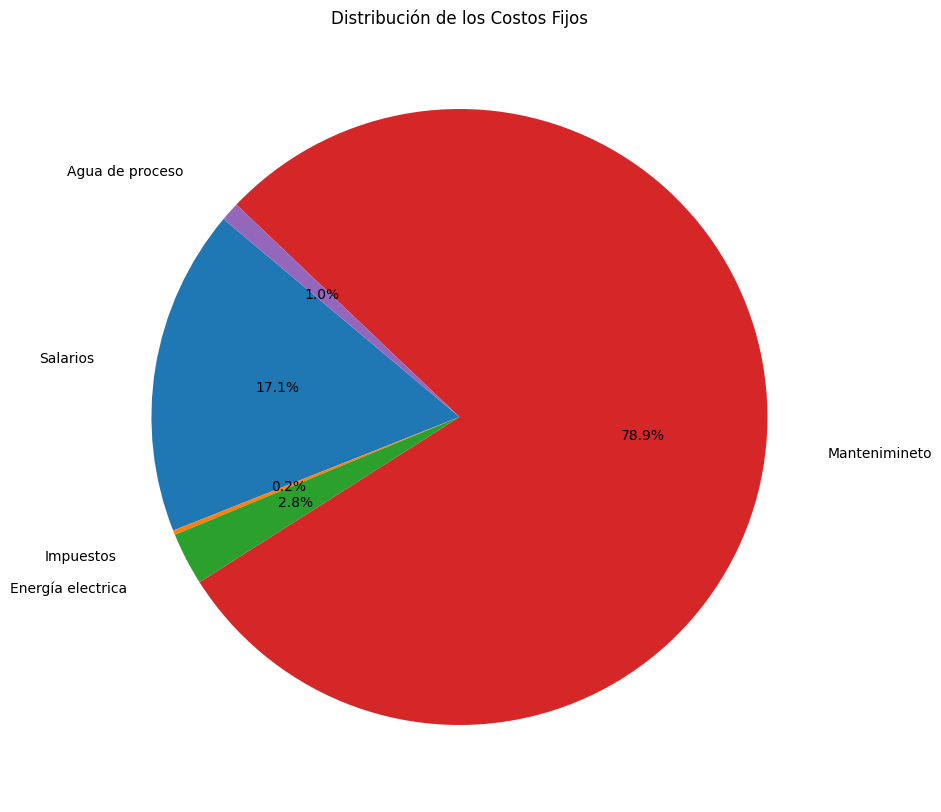

In [192]:
import matplotlib.pyplot as plt

# Componentes de los costos fijos
componentes = {
    "Salarios": OL_total,
    "Impuestos": tax_total,
    "Energía electrica ": Power_total,
    "Mantenimineto": Main_total.maintenance_cost,
    "Agua de proceso": water_total
}

# Crear etiquetas y valores
labels = componentes.keys()
values = componentes.values()

# Crear gráfica de pastel
plt.figure(figsize=(10,10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
plt.title("Distribución de los Costos Fijos")
plt.show()

<h2>Variable cost</h2>

<p>Variable costs consider:</p>
<ol>
    <li>Miscellaneous operating materials:
        <ol>
            <li>Safety clothing: gloves, safety glasses etc.</li>
            <li>Office articles</li>
        </ol>
        
</ol>

In [193]:
import pandas as pd

data = {
    "Material": [
        "Paquete de hojas", "Tintas para impresión", "Bolígrafos", "Carpetas", "Bitacoras", 
        "Engrapadoras", "Paquetes de grapas", "Guantes de Latex", "Guantes aislantes térmicos", 
        "Googles de seguridad", "Botas de seguridad", "Uniformes", "Cascos de seguridad", 
        "Tapones industriales para los oídos"
    ],
    "Descripción": [
        "Papel Bond Carta Office Depot / Paquete 500 hojas blancas", 
        "Cartucho de Tinta HP 938 Negro 1250 páginas", 
        "Plumas Bic Cristal Dura Más / Punto mediano / Tinta negra / 12 piezas", 
        "REGISTRADOR LEFORT ESQUELA (VERDE, 700 HOJAS)", 
        "Libro Francés Estrella Raya 192 hojas", 
        "Engrapadora Metálica Mae EMM-10 / Tira completa", 
        "Grapas Estándar Pilot Fifa Flex 5040 piezas", 
        "Guante De Latex Estéril Ambiderm Talla Mediana Con 100 Piezas Color Natural Acabado Liso Textura Sedosa Para exploración Desechables De alta sensibilidad al tacto Confortables y seguros.", 
        "GUANTE SILVERLINE NITRILO (NEGRO, NYLON)", 
        "6 Pack Googles Protección Médica E Industrial Economicos", 
        "Botas de seguridad Sicuro SAEC0844 casco poliamida y suelas", 
        "Overall industrial", 
        "Casco de uso pesado para utilizar en el trabajo", 
        "AirSoft® Tapones Auditivos con Cordón caja de 100 pares"
    ],
    "Cantidad": [
        30, 10, 15, 20, 25, 15, 25, 15, 30, 10, 20, 20, 15, 3
    ],
    "Costo aprox por unidad": [
        139, 849, 53, 69, 239, 169, 29, 137, 59, 235, 323.57, 629, 220, 3564
    ],
    "Costo por año (MNX/año)": [
        4170, 8490, 795, 1380, 5975, 2535, 725, 2055, 1770, 2350, 6471.4, 12580, 880, 10692
    ]
}
variables = pd.DataFrame(data)
variables.loc["Total"]= variables[["Costo por año (MNX/año)"]].replace('[\$,]', '', regex=True).astype(float).sum()
variables.loc["Total", "Material"] = "Total"
cv_total = variables.iloc[-1]["Costo por año (MNX/año)"]

variables["Costo por año (MNX/año)"] = variables["Costo por año (MNX/año)"].apply(lambda x: f"${x:,.2f}")


variables

,Material,Descripción,Cantidad,Costo aprox por unidad,Costo por año (MNX/año)
0,Paquete de hojas,Papel Bond Carta Office Depot / Paquete 500 ho...,30.0,139.00,"$4,170.00"
1,Tintas para impresión,Cartucho de Tinta HP 938 Negro 1250 páginas,10.0,849.00,"$8,490.00"
2,Bolígrafos,Plumas Bic Cristal Dura Más / Punto mediano / ...,15.0,53.00,$795.00
3,Carpetas,"REGISTRADOR LEFORT ESQUELA (VERDE, 700 HOJAS)",20.0,69.00,"$1,380.00"
4,Bitacoras,Libro Francés Estrella Raya 192 hojas,25.0,239.00,"$5,975.00"
5,Engrapadoras,Engrapadora Metálica Mae EMM-10 / Tira completa,15.0,169.00,"$2,535.00"
6,Paquetes de grapas,Grapas Estándar Pilot Fifa Flex 5040 piezas,25.0,29.00,$725.00
7,Guantes de Latex,Guante De Latex Estéril Ambiderm Talla Mediana...,15.0,137.00,"$2,055.00"
8,Guantes aislantes térmicos,"GUANTE SILVERLINE NITRILO (NEGRO, NYLON)",30.0,59.00,"$1,770.00"
9,Googles de seguridad,6 Pack Googles Protección Médica E Industrial ...,10.0,235.00,"$2,350.00"


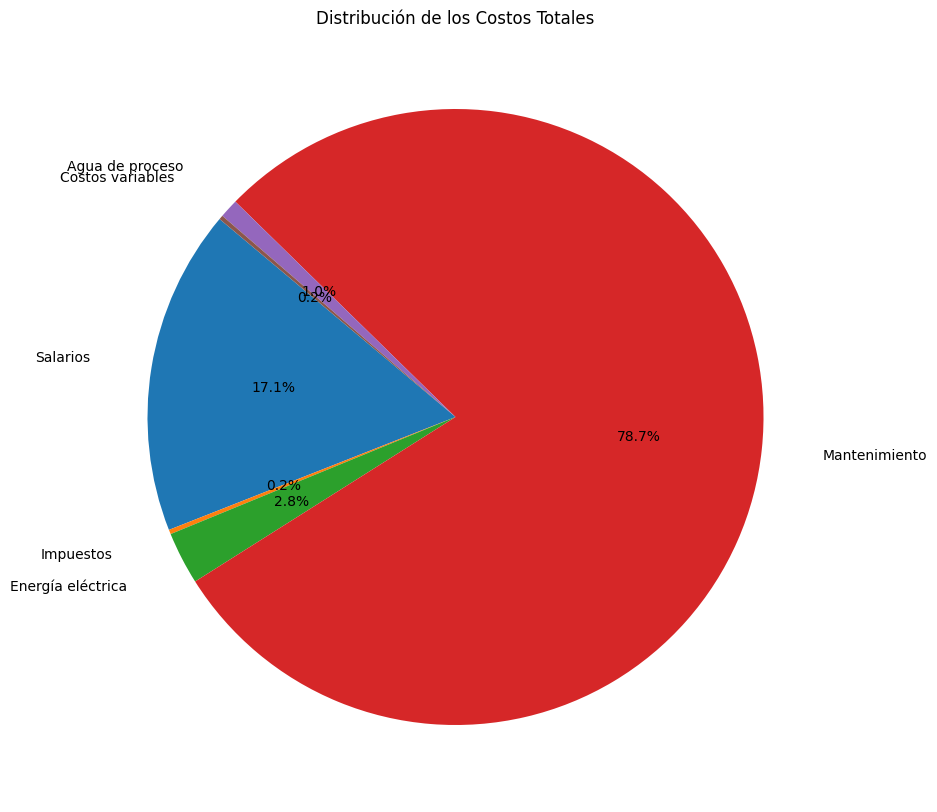

In [194]:
import matplotlib.pyplot as plt

# Componentes de los costos totales
costos_totales = {
    "Salarios": OL_total,
    "Impuestos": tax_total,
    "Energía eléctrica": Power_total,
    "Mantenimiento": Main_total.maintenance_cost,
    "Agua de proceso": water_total,
    "Costos variables": cv_total
}

# Crear etiquetas y valores
labels = costos_totales.keys()
values = costos_totales.values()

# Crear gráfica de pastel
plt.figure(figsize=(10, 10))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
plt.title("Distribución de los Costos Totales")
plt.show()

<h1>Punto de equilibrio</h1>

In [195]:
Cfijos_totales=OL_total+tax_total+Power_total+Main_total.maintenance_cost+water_total #suma de todos los costos fijos
Cfijos_totales #total de costos fijos al año 
print("costos fijos totales: ${:,.2f}".format(Cfijos_totales), "MNX al año")


costos fijos totales: $27,809,193.91 MNX al año


In [196]:
n_unidades= 4*1000*365 #kg por año
Cvariable=cv_total/n_unidades #costo variable por kg
print("costos variables unitarios: ${:,.2f}".format(Cvariable), "MXN/kg al año")
print("costos variables unitarios: ${:,.2f}".format(Cvariable*1000), "MXN/ton al año")



costos variables unitarios: $0.04 MXN/kg al año
costos variables unitarios: $41.69 MXN/ton al año


In [197]:
#precio de venta unitario.
PVU= 6 #5 usd por kg
PVU=PVU*19.45 #conversion de USD a MNX

#calculo  del punto de equilibrio 
PE= (Cfijos_totales/(PVU-Cvariable)) #punto de equilibrio en toneladas
PE=PE/365
print("El punto de equilibrio es: {:.2f}".format(PE), "kg al día") 
print("El punto de equilibrio es: {:.2f}".format(PE/1000), "TON al día") 



El punto de equilibrio es: 653.10 kg al día
El punto de equilibrio es: 0.65 TON al día


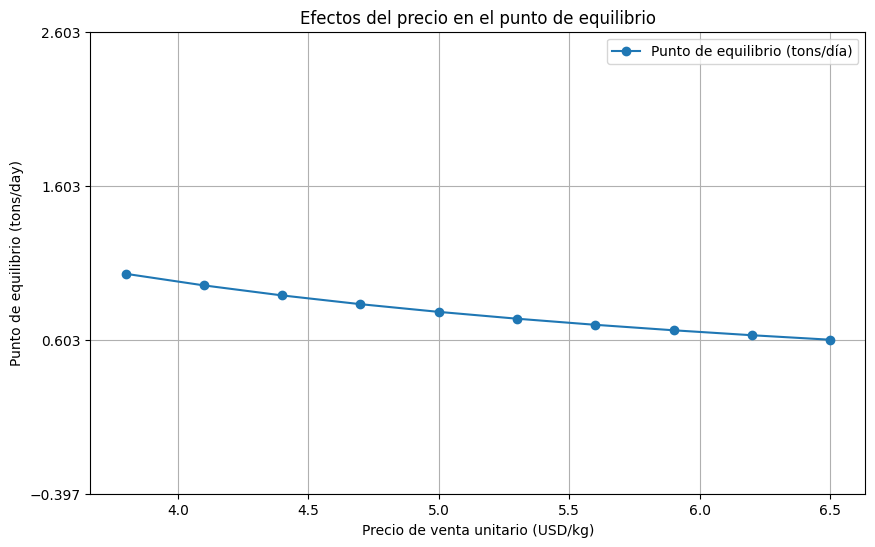

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a list of 10 elements between 3.8 and 6.5
PVU_list = np.linspace(3.8, 6.5, 10)

# Function to calculate equilibrium point (PE)
def calculate_PE(PVU_list, Cfijos_totales, Cvariable):
    PE_list = []
    for PVU in PVU_list:
        PVU_MNX = PVU * 1000 * 19.45  # Convert USD/kg to MNX/ton
        PE = Cfijos_totales / (PVU_MNX - Cvariable)
        PE_list.append(PE / 365)  # Convert to tons per day
    return PE_list

# Calculate PE for the list of PVU
PE_list = calculate_PE(PVU_list, Cfijos_totales, Cvariable)


plt.figure(figsize=(10, 6))
plt.plot(PVU_list, PE_list, marker='o', label="Punto de equilibrio (tons/día)")
plt.title("Efectos del precio en el punto de equilibrio")
plt.xlabel("Precio de venta unitario (USD/kg)")
plt.ylabel("Punto de equilibrio (tons/day)")
plt.grid()


plt.yticks(np.arange(min(PE_list) - 1, max(PE_list) + 2, 1))

plt.legend()
plt.show()

<h1>flujo de efectivo</h1>

In [199]:
produccion_diaria=4 #toneladas de H2 por dia
produccion_anual=produccion_diaria*365 #toneladas de H2 por año
producion_anual_kg=produccion_anual*1000 #kg de H2 por año

#####Precio de venta unitario 
precio_KgH2_USD=6 #USD por kg de H2
precio_KgH2_MXN=precio_KgH2_USD*19.45 #MXN por kg de H2

#### Ganacias Brutas en el primer año
ganancia_bruta=producion_anual_kg*precio_KgH2_MXN #MXN por año
print("Ganancia bruta anual: ${:,.2f}".format(ganancia_bruta), "MXN al año")

Ganancia bruta anual: $170,382,000.00 MXN al año


In [ ]:
import matplotlib.pyplot as plt

# Datos del flujo de efectivo y tiempos
flujo_de_efectivo = [
    -444793113.52, 
    -385774566.64, 	
    -347771053.19, 	
    -306481928.86, 	
    -261721556.20, 	
    -213295245.91, 	
    -160998845.88, 	
    -104612068.07, 	
    -43910342.58 ,	 
    21366688.02 ,	 
    91466453.08 ,	 
    166641972.43 ,	 
    247170919.76 ,	 
    333337824.40 ,	 
    425440708.64 ,	 
    523791690.75 
]
tiempos = list(range(len(flujo_de_efectivo)))

# Colores para las barras
colores = ['red' if valor < 0 else 'green' for valor in flujo_de_efectivo]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tiempos, flujo_de_efectivo, color=colores)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea en y=0
plt.title("Diagrama de Flujo de Efectivo")
plt.xlabel("Tiempo (años)")
plt.ylabel("Flujo de Efectivo (MXN)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


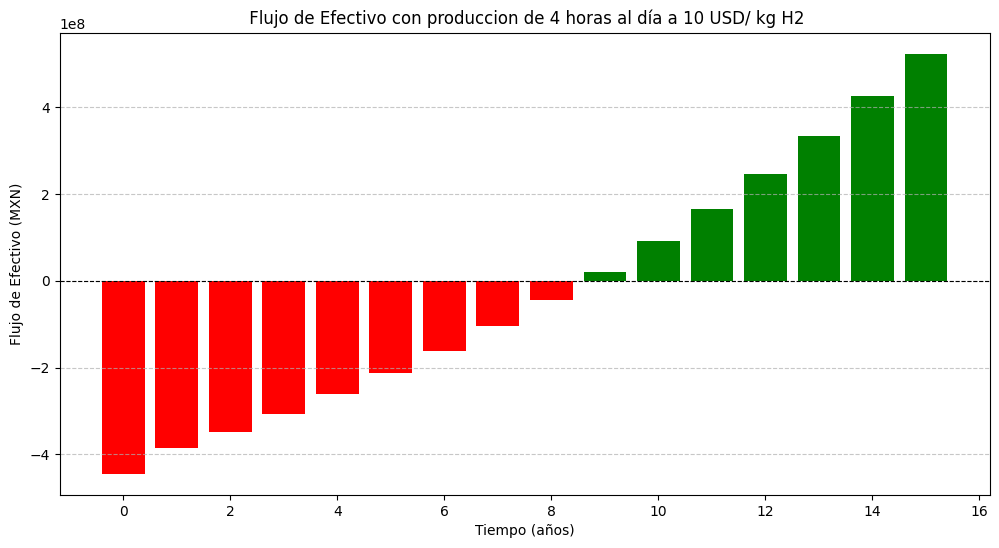

In [200]:
import matplotlib.pyplot as plt

# Datos del flujo de efectivo y tiempos
flujo_de_efectivo = [
    -444793113.52, 
    -385774566.64, 	
    -347771053.19, 	
    -306481928.86, 	
    -261721556.20, 	
    -213295245.91, 	
    -160998845.88, 	
    -104612068.07, 	
    -43910342.58 ,	 
    21366688.02 ,	 
    91466453.08 ,	 
    166641972.43 ,	 
    247170919.76 ,	 
    333337824.40 ,	 
    425440708.64 ,	 
    523791690.75 
]
tiempos = list(range(len(flujo_de_efectivo)))

# Colores para las barras
colores = ['red' if valor < 0 else 'green' for valor in flujo_de_efectivo]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tiempos, flujo_de_efectivo, color=colores)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea en y=0
plt.title(" Flujo de Efectivo con produccion de 4 horas al día a 10 USD/ kg H2")
plt.xlabel("Tiempo (años)")
plt.ylabel("Flujo de Efectivo (MXN)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

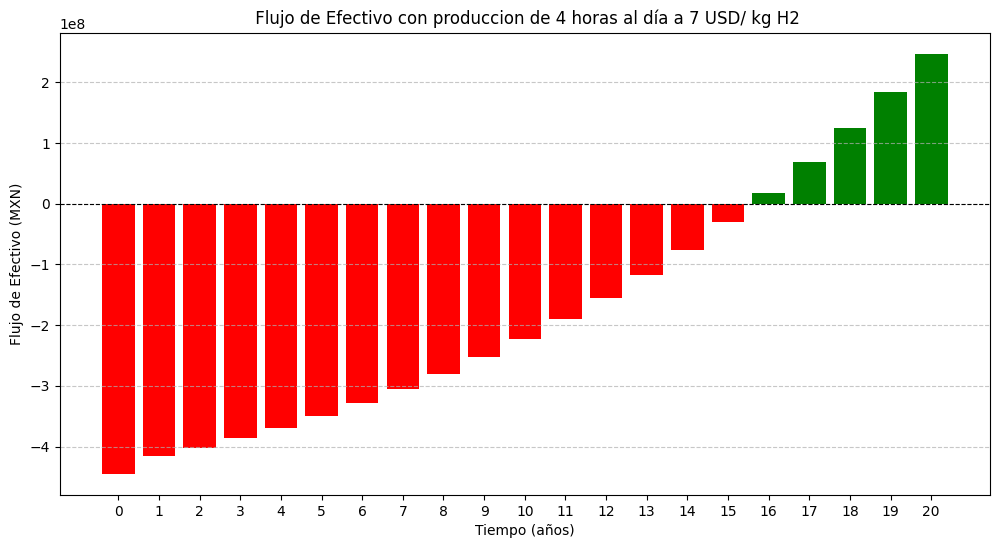

In [201]:
import matplotlib.pyplot as plt

# Datos del flujo de efectivo y tiempos
flujo_de_efectivo = [
    -444802775.20, -415609636.67, -401766588.85, -386293029.40, -369090182.71,
    -350054315.51, -329076508.32, -306036159.70, -280813063.94, -253256048.93,
    -223232007.95, -190607569.08, -155230229.72, -116946436.18, -75595189.46,
    -31007708.40, 16992921.92, 68592116.96, 123984175.50, 183372678.94,
    246970907.97
]
tiempos = list(range(len(flujo_de_efectivo)))

# Colores para las barras
colores = ['red' if valor < 0 else 'green' for valor in flujo_de_efectivo]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tiempos, flujo_de_efectivo, color=colores)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea en y=0
plt.title(" Flujo de Efectivo con produccion de 4 horas al día a 7 USD/ kg H2")
plt.xlabel("Tiempo (años)")
plt.ylabel("Flujo de Efectivo (MXN)")
plt.xticks(ticks=range(0, 21, 1))  # Escala del eje x de 0 a 20 de uno en uno
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

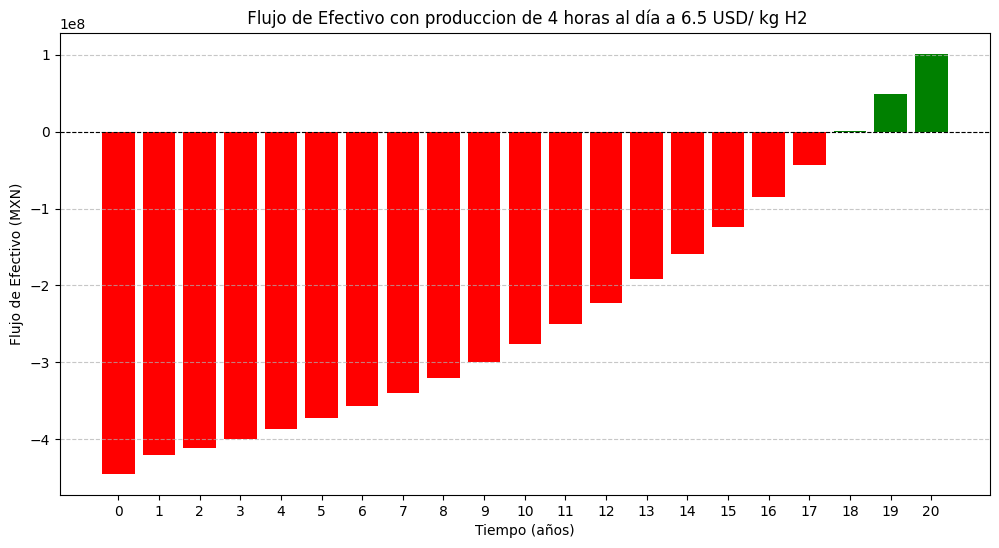

In [202]:
import matplotlib.pyplot as plt

# Datos del flujo de efectivo y tiempos
flujo_de_efectivo = [
    -444802775.20,
    -420579111.67, 	
    -410761338.60, 	
    -399588859.76, 	
    -386977375.63, 	
    -372838311.37, 	
    -357078618.69, 	
    -339594311.80, 	
    -320282578.17, 	
    -299010450.84, 	
    -275663876.27, 	
    -250129421.17, 	
    -222275446.22, 	
    -191970226.36, 	
    -159075599.22, 	
    -123446672.56, 	
    -84931518.96 ,	
    -43370857.26 ,	 
    1402279.94 	, 
    49562893.13 ,	 
    101294377.85 

]
tiempos = list(range(len(flujo_de_efectivo)))

# Colores para las barras
colores = ['red' if valor < 0 else 'green' for valor in flujo_de_efectivo]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tiempos, flujo_de_efectivo, color=colores)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea en y=0
plt.title(" Flujo de Efectivo con produccion de 4 horas al día a 6.5 USD/ kg H2")
plt.xlabel("Tiempo (años)")
plt.ylabel("Flujo de Efectivo (MXN)")
plt.xticks(ticks=range(0, 21, 1))  # Escala del eje x de 0 a 20 de uno en uno
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Para el caso de 24 horas 

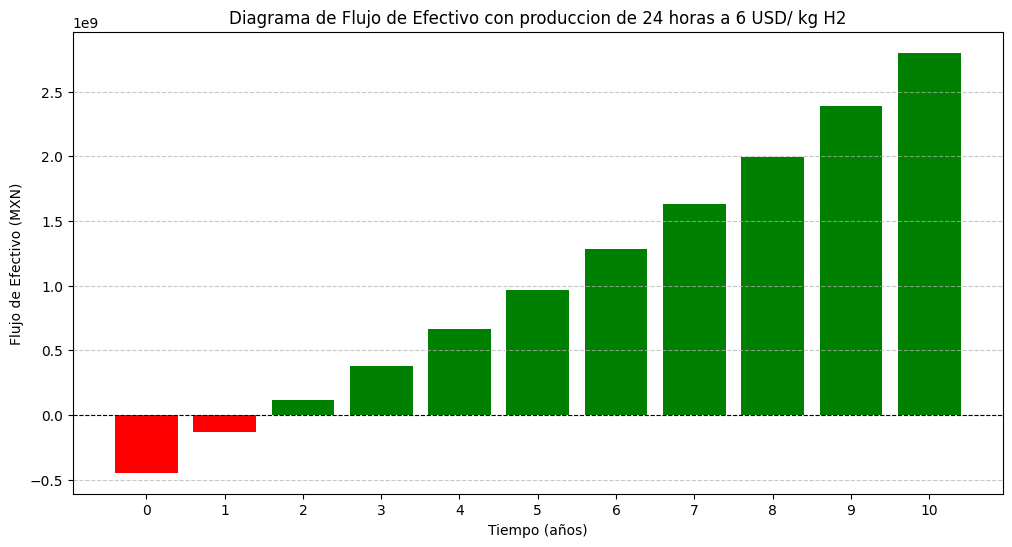

In [203]:
# Datos del flujo de efectivo y tiempos
flujo_de_efectivo = [
    -445885358.32,
    -129621033.73 ,
    116449799.28 ,
    380063902.56 ,
    662155271.47 ,
    963702229.13 ,
    1285729408.57 ,	 
    1629316077.65 ,	 
    1995585969.20 ,	 
    2385740633.02 ,	 
    2801012479.39 
]
tiempos = list(range(len(flujo_de_efectivo)))

# Colores para las barras
colores = ['red' if valor < 0 else 'green' for valor in flujo_de_efectivo]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tiempos, flujo_de_efectivo, color=colores)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea en y=0
plt.title("Diagrama de Flujo de Efectivo con produccion de 24 horas a 6 USD/ kg H2")
plt.xlabel("Tiempo (años)")
plt.ylabel("Flujo de Efectivo (MXN)")
plt.xticks(ticks=range(0, 11, 1))  # Escala del eje x de 0 a 20 de uno en uno
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

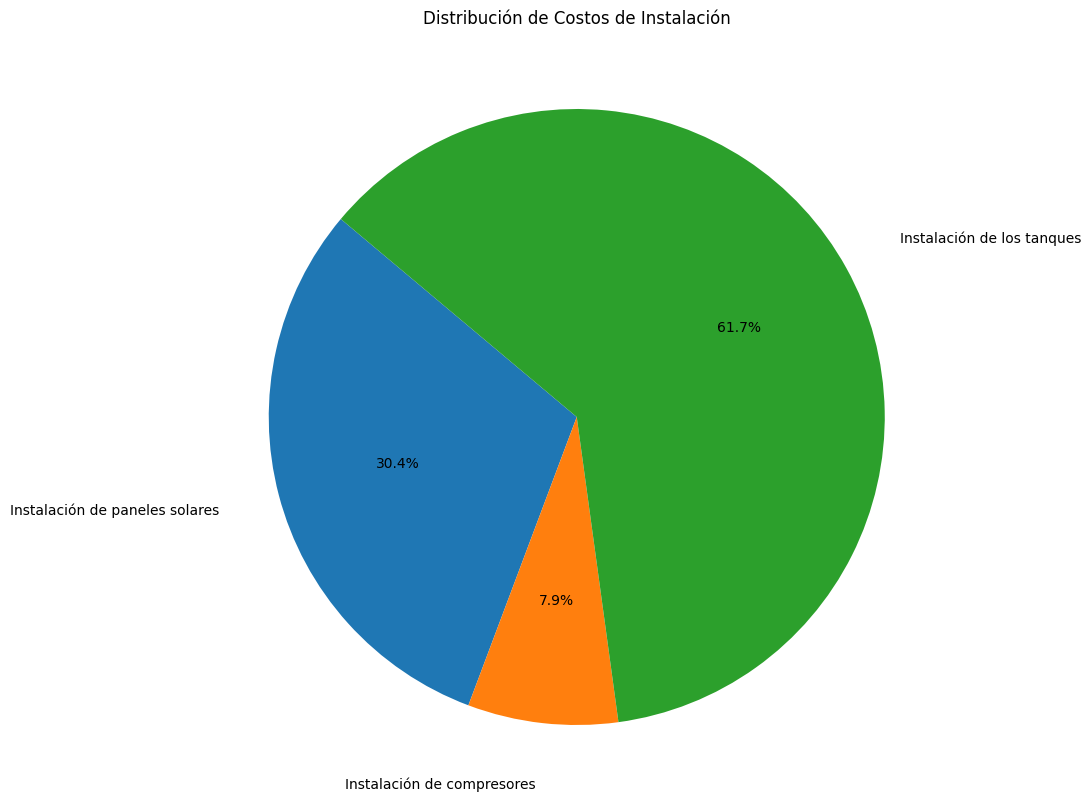

In [204]:
import matplotlib.pyplot as plt

# Data for the pie chart
activities = [
    "Instalación de paneles solares",
    "Instalación de compresores",
    "Instalación de los tanques"
]
costs = [ 
     159119517.76 ,
     41282508.30 ,
     323199086.80 ,
 
]

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(costs, labels=activities, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
plt.title("Distribución de Costos de Instalación")
plt.show()

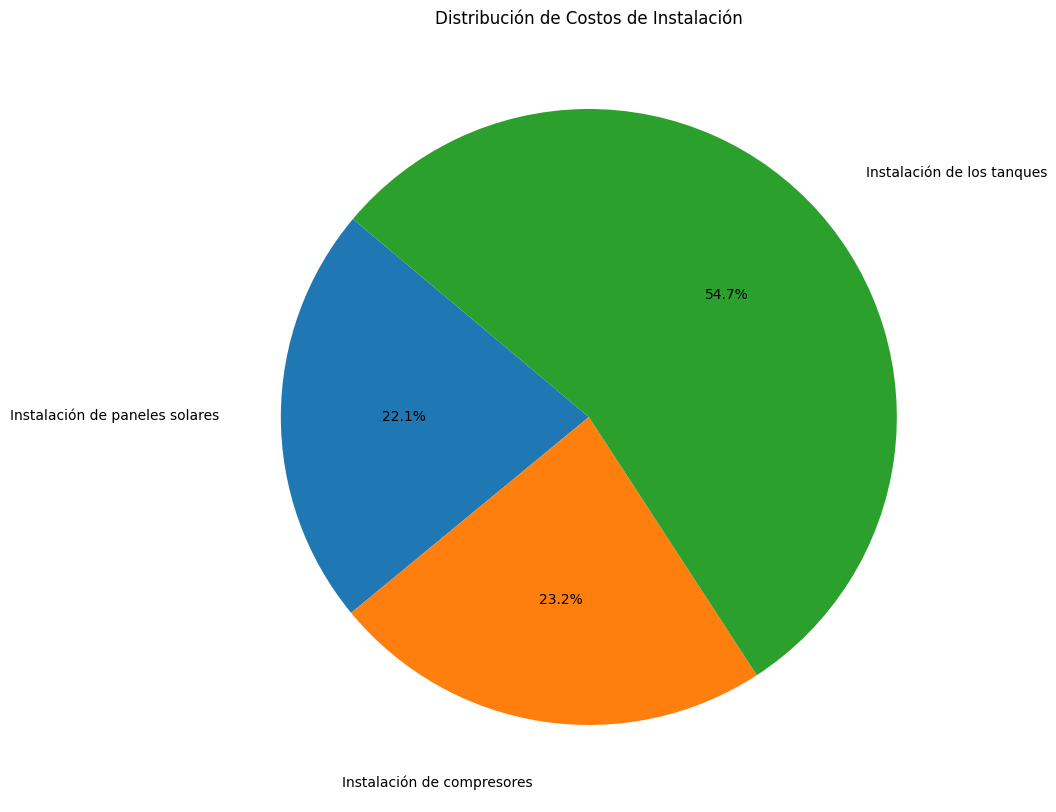

In [205]:
import matplotlib.pyplot as plt

# Data for the pie chart
activities = [
    "Instalación de paneles solares",
    "Instalación de compresores",
    "Instalación de los tanques"
]
costs = [ 132239081.04, 
          139027159.13, 
          327648989.55, 
]

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(costs, labels=activities, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
plt.title("Distribución de Costos de Instalación")
plt.show()


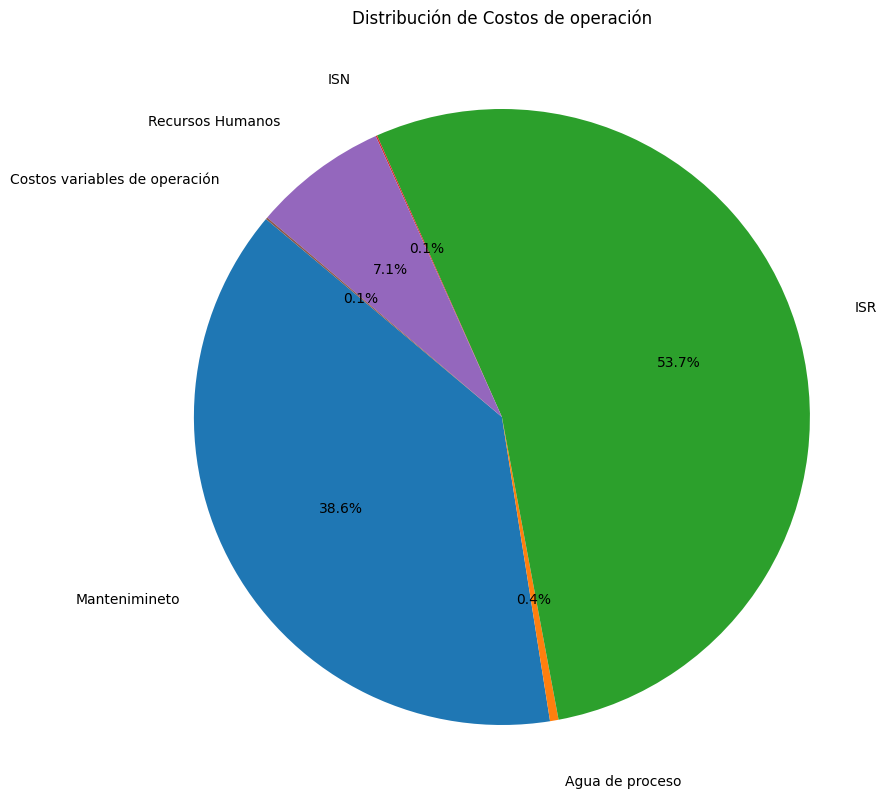

In [206]:

# Data for the pie chart
activities = [
    "Mantenimineto",
    "Agua de proceso",
    "ISR",
    "ISN",
    "Recursos Humanos",
    "Costos variables de operación",
]
costs = [ 
     26160617.23,
     302802.82,
     36384508.16,
     49394.70 ,
     4792050.01,
     65835.26,
     

]

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(costs, labels=activities, autopct='%1.1f%%', startangle=140, labeldistance=1.2)
plt.title("Distribución de Costos de operación")
plt.show()


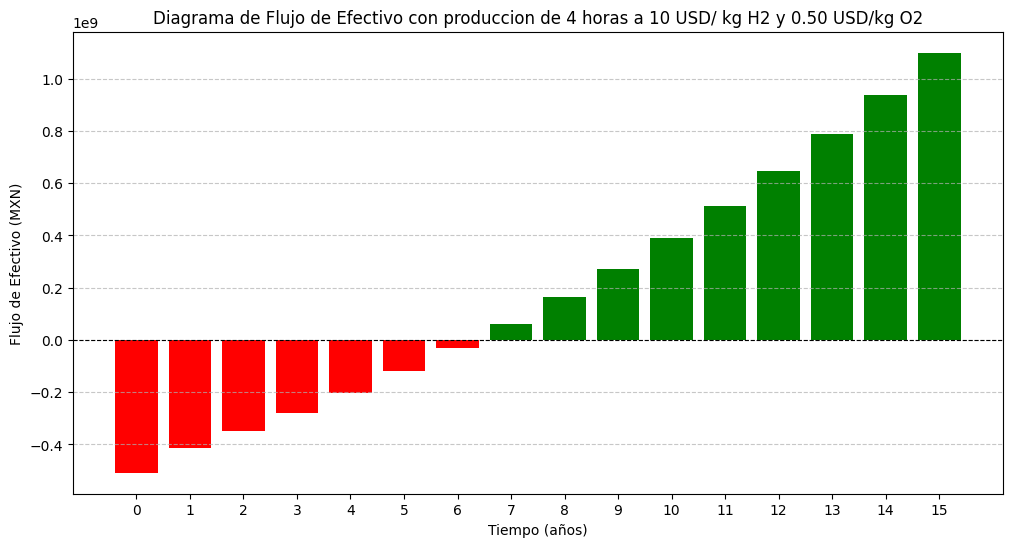

In [207]:
# Datos del flujo de efectivo y tiempos
flujo_de_efectivo = [
    -508179608.90, 
    -413803702.89, 	
    -348434989.53, 	
    -277831466.32, 	
    -201703890.15, 	
    -119749052.65, 	
    -31649149.71 ,	 
    62935120.78 , 
    164352943.81 ,	 
    272995142.14 ,	 
    389245720.74 ,	 
    513500656.42 ,	 
    646187244.11 ,	 
    787746593.52 ,	 
    938640574.06 ,	 
    1099352738.7, 


]
tiempos = list(range(len(flujo_de_efectivo)))

# Colores para las barras
colores = ['red' if valor < 0 else 'green' for valor in flujo_de_efectivo]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tiempos, flujo_de_efectivo, color=colores)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea en y=0
plt.title("Diagrama de Flujo de Efectivo con produccion de 4 horas a 10 USD/ kg H2 y 0.50 USD/kg O2")
plt.xlabel("Tiempo (años)")
plt.ylabel("Flujo de Efectivo (MXN)")
plt.xticks(ticks=range(0, 16, 1))  # Escala del eje x de 0 a 20 de uno en uno
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

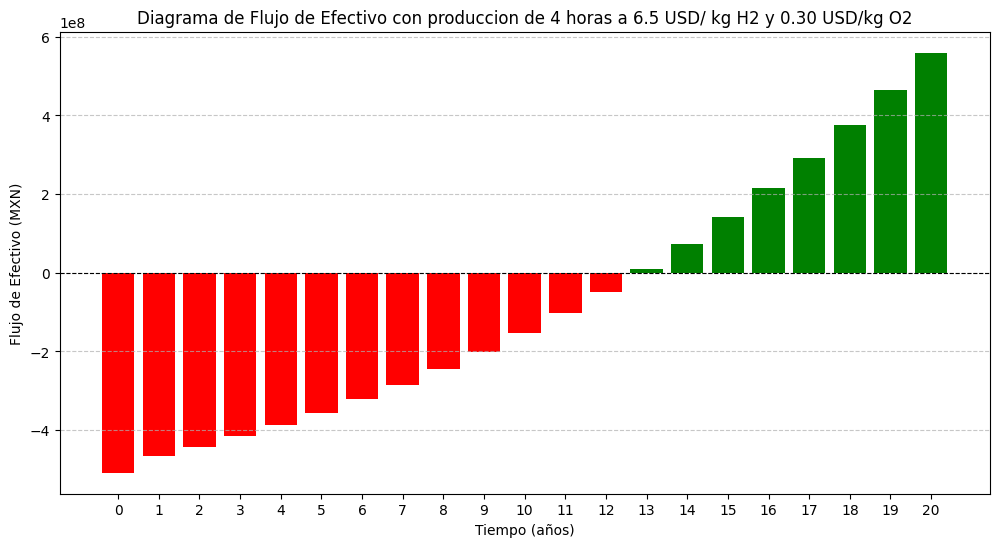

In [208]:
# Datos del flujo de efectivo y tiempos
flujo_de_efectivo = [
    -508189270.6,	
    -465304457.5,	
    -441645095.5,	
    -415608446	,
    -387055238.9,	
    -355839307.4,	
    -321807273.4,	
    -284791960.1,	
    -244624375.2,	
    -201102249.9,	
    -154038967.3,	
    -103245124.4,	
    -48509554.49,	
    10382710.86	,
    73656957.6	,
    141549253.7	,
    214306933.6	,
    292189103.2	,
    375467167.8	,
    464425381.4	,
    559361420.6,
]
tiempos = list(range(len(flujo_de_efectivo)))

# Colores para las barras
colores = ['red' if valor < 0 else 'green' for valor in flujo_de_efectivo]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(tiempos, flujo_de_efectivo, color=colores)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea en y=0
plt.title("Diagrama de Flujo de Efectivo con produccion de 4 horas a 6.5 USD/ kg H2 y 0.30 USD/kg O2")
plt.xlabel("Tiempo (años)")
plt.ylabel("Flujo de Efectivo (MXN)")
plt.xticks(ticks=range(0, 21, 1))  # Escala del eje x de 0 a 20 de uno en uno
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()